In [20]:
import math
import matplotlib.pyplot as plt
import numpy as np

Basically, I noted the two numerical limits:

$$
\begin{matrix}
\lim_{x \rightarrow \infty} \frac{\Pi(x)}{e^x} = \infty & \lim_{x \rightarrow \infty} \frac{\Pi(x)}{e^{x^2}} = 0
\end{matrix}
$$

So I wonder if there is a constant $r$ between $1$ and $2$ such that $\displaystyle{\Pi(x) = e^{x^r}}$. Assume such a constant exist.

Define $L(x) = \log \Pi(x)$. We have

$$
\exp L(x) = \exp (x^r) \\
\Rightarrow L(x) = x^r \\
\Rightarrow r = \log_{x} L(x)
$$


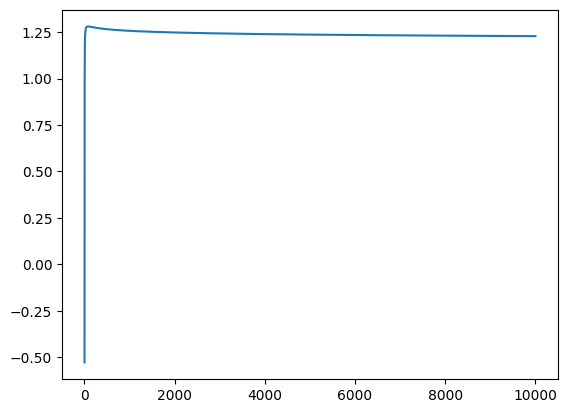

In [29]:
def gauss_pi(x: float) -> float:
    return math.gamma(x + 1)

def L(x: float) -> float:
    return math.lgamma(x + 1)

def r(x: float) -> float:
    return math.log(L(x), x)

x = np.linspace(2, 10000, 1000000)
y = np.array([r(i) for i in x])
plt.plot(x, y)

We can use another approximation: Stirling's Formula. We define the function:

$$
\Pi(x) \sim S(x) = \sqrt{2\pi x} \left( \frac{x}{e} \right)^x \left(1 + \frac{1}{12x} \right)
$$

We define $C = \sqrt{2\pi}$ and we have:

$$
\log S(x) = \log\left[C \sqrt{x} \left( \frac{x}{e} \right)^x \left(1 + \frac{1}{12x} \right)\right] \\
= \log C + \frac{\log x}{2} + x \log\left( \frac{x}{e} \right) + \log \left(1 + \frac{1}{12x} \right) \\
= \log C + \frac{\log x}{2} + x \left( \log x - 1 \right) + \log \left(1 + \frac{1}{12x} \right)
$$


In [31]:
def log_S(x: float) -> float:
    log_c = math.log(2 * math.pi) / 2
    return log_c + math.log(x) / 2 + x * (math.log(x) - 1) + math.log1p(1 / (12 * x))

math.exp(log_S(5))

119.9861540902166

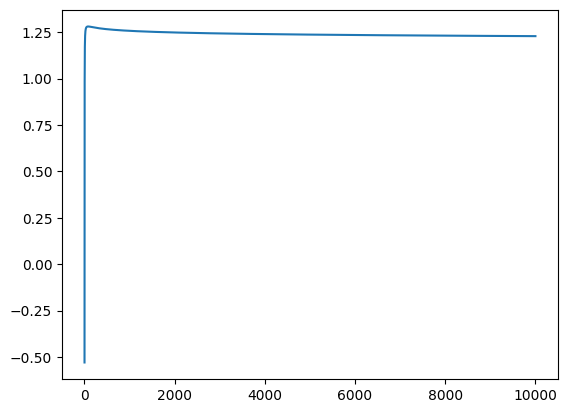

In [32]:
def r_S(x: float) -> float:
    return math.log(log_S(x), x)


x = np.linspace(2, 10000, 1000000)
y = np.array([r_S(i) for i in x])
plt.plot(x, y)